# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

#### Importações

In [1]:
# Importações de bibliotecas para manipulação e visualização de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importações de modelos de machine learning 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Importações de ferramentas de pré-processamento e avaliação de modelos 

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [2]:
df = pd.read_csv('marketing_campaign.csv', delimiter=';')
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,46,709,43,182,42,118,247,4,5,0,1
2236,1946,PhD,Together,64014.0,2,56,406,0,30,0,0,8,5,7,0,1
2237,1981,Graduation,Divorced,56981.0,0,91,908,48,217,32,12,24,13,6,0,0
2238,1956,Master,Together,69245.0,0,8,428,30,214,80,30,61,10,3,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [4]:
df_nulos = df[df.isnull().any(axis=1)] # Filtra as linhas com valores nulos
qtde_nulos = len(df_nulos) # Conta a quantidade de linhas com valores nulos
porcentagem_nulos = (qtde_nulos / len(df)) # Calcula a porcentagem de linhas com valores nulos

print(f'{porcentagem_nulos:.2%}') # Formata a porcentagem com duas casas decimais

1.07%


In [5]:
renda_mediana = df['Income'].median() # Calcula a mediana da coluna 'Income'

df.loc[:, 'Income'] = df['Income'].fillna(renda_mediana) # Substitui valores nulos pela mediana

print(f'Valores Nulos:{df.isna().sum().sum()}') # Verifica se ainda existem valores nulos no DataFrame

Valores Nulos:0


#### Valores Nulos 

A primeira etapa do projeto consiste na exploração e limpeza dos dados. Foi possível verificar através do 'df.info()' que todas as variáveis possuíam os 'dtypes' esperados para o que representam e apenas a variável 'Income' apresentou valores nulos, cerca de 1% dos casos, então se deu a necessidade de tratá-los. Vendo que representavam poucas linhas, a solução para manter essas informações foi preenchê-las com a mediana, já que isso manteria a variável estável, evitando o enviesamento do modelo e garantindo previsões mais precisas. Por fim, verifica-se se todos os valores nulos foram devidamente corrigidos. 

In [6]:
print(df['Education'].unique()) # Verifica os valores únicos da coluna 'Education'
print(df['Marital_Status'].unique()) # Verifica os valores únicos da coluna 'Marital_Status'

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


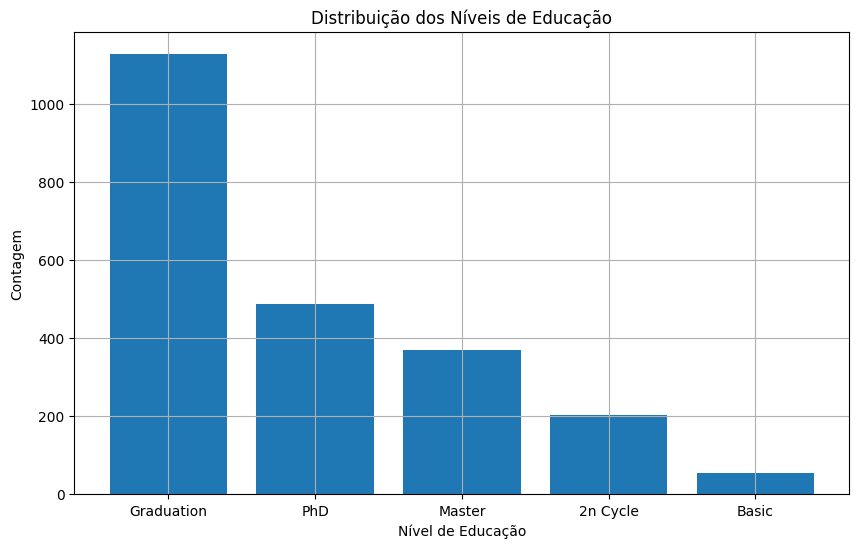

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [7]:
contagem = df['Education'].value_counts() # Conta a frequência de cada valor na coluna 'Education'

plt.figure(figsize=(10, 6)) # Define o tamanho da figura
plt.bar(contagem.index, contagem) # Cria o gráfico de barras
plt.grid(True) # Adiciona uma grade ao gráfico
plt.xlabel('Nível de Educação') # Rótulo do eixo x
plt.ylabel('Contagem') # Rótulo do eixo y
plt.title('Distribuição dos Níveis de Educação') # Título do gráfico
plt.show() # Exibe o gráfico

df['Education'].value_counts() # Conta a frequência de cada valor na coluna 'Education'

In [8]:
df['Education'] = df['Education'].replace({'2n Cycle':'Master'}) # Agrupa '2n Cycle' em 'Master'

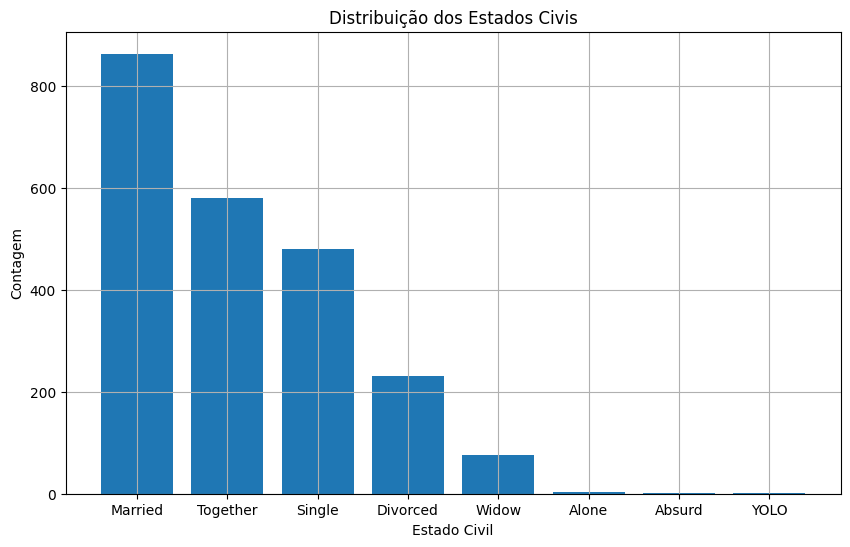

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [9]:
contagem = df['Marital_Status'].value_counts() # Conta a frequência de cada valor na coluna 'Marital_Status'

plt.figure(figsize=(10, 6)) # Define o tamanho da figura
plt.bar(contagem.index, contagem) # Cria o gráfico de barras
plt.grid(True) # Adiciona uma grade ao gráfico
plt.xlabel('Estado Civil') # Rótulo do eixo x
plt.ylabel('Contagem') # Rótulo do eixo y
plt.title('Distribuição dos Estados Civis') # Título do gráfico
plt.show() # Exibe o gráfico

df['Marital_Status'].value_counts() # Conta a frequência de cada valor na coluna 'Marital_Status'

In [10]:
valores_remover = ['YOLO', 'Absurd'] # Define os valores a serem removidos
df = df[~df['Marital_Status'].isin(valores_remover)] # Remove as linhas com os valores especificados

df.loc[:, 'Marital_Status'] = df['Marital_Status'].replace({'Alone':'Single'}) # Agrupa 'Alone' em 'Single'

#### Dados Categóricos 

Em seguida, se deu a checagem dos dados categóricos presentes na base. O primeiro passo foi verificar quais os valores únicos presentes em cada variável através do 'df.unique()' e, por meio dele, é visto que não há dados escritos de forma incorreta em nenhuma das colunas, porém existem inconsistências em cada uma delas: 

* **Education**: Na variável de nível de escolaridade, é possível ver a existência de um valor que não é semelhante aos outros: '2nd Cycle'. Após pesquisas feitas, foi descoberto que esse termo é uma forma utilizada em determinadas regiões para mestrado, ou seja, os casos de '2nd Cycle' e 'Master' devem ser agrupados juntos por representarem o mesmo grau de ensino. Assim, a base passa a ter 4 valores na coluna 'Education': 'Basic', que representa aqueles com até Ensino Médio completo, 'Graduation', que são aqueles com Ensino Superior, 'Master', os com mestrados e 'PhD', os com doutorado. 

* **Marital_Status**: A variável de estado civil aprensentou ainda mais problemas que a anterior. Aqui, existem 2 valores que não se encaixam de forma alguma na categoria que estão: 'Absurd' (Absurdo) e 'YOLO' (sigla em inglês para 'Só se vive uma vez'), então, após verificar-se de que havia apenas 4 casos totais com essas respostas, a decisão foi tomada de retirá-los, já que são incorretos, poucos e prejudicariam o algoritmo. Além disso, o valor 'Alone' tão apresentou pouca frequência, mas, nesse caso, é apenas uma forma diferente de 'Single', ou seja, solteiro, então os valores foram juntados. Por fim, vale ressaltar que 'Together' não é uma opção recorrente em formulários ou relatórios formais de preenchimento de dados pessoais, mas por ser o segundo valor que mais aparece na base e representar um estado civil diferente das outras respostas, identificando pessoas em um relacionamento, mas que não é reconhecido pelo Estado, nenhuma alteração foi feita. Dessa forma, a variável passa a ter 5 valores de 'Married'(Casado), 'Single'(Solteiro), 'Divorced'(Divorciado), 'Widow(Viúvo) e 'Together'(Em relacionamento). 

Com isso, a variáveis categóricas foram devidamente tratadas 

In [11]:
df.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,1968.796512,52223.376565,0.444991,49.147138,303.873435,26.271020,166.924419,37.405188,27.081395,43.880590,5.789356,5.317531,0.009392,0.503131
std,11.980604,25052.009240,0.538551,28.954880,336.876776,39.761356,225.778550,54.436749,41.300943,51.979634,3.253756,2.424756,0.096477,0.500102
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35502.500000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68289.750000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,13.000000,20.000000,1.000000,1.000000


In [12]:
cols_to_plot = [ # Lista das colunas a serem plotadas
    'Year_Birth', 'Income', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

fig = make_subplots( # Cria uma figura com subplots
    rows=2, # Número de linhas
    cols=4, # Número de colunas
    subplot_titles=cols_to_plot, # Títulos dos subplots
    vertical_spacing=0.1, # Espaçamento vertical entre os subplots
    horizontal_spacing=0.08 # Espaçamento horizontal entre os subplots
)

i = 0 # Índice para acessar os nomes das colunas
for row_num in range(1, 3): # Loop pelas linhas
    for col_num in range(1, 5): # Loop pelas colunas
        col_name = cols_to_plot[i] # Nome da coluna atual
        if col_name == 'MntGoldProds': # Condição para destacar a coluna 'MntGoldProds'
            fig.add_trace( 
                go.Box(y=df[col_name], name=col_name, boxpoints='outliers', marker_color="#858628"), # 
                row=row_num,
                col=col_num
            )
        else:
            fig.add_trace(
                go.Box(y=df[col_name], name=col_name, boxpoints='outliers'), # Adiciona uma caixa de boxplot ao subplot de acordo com a linha e coluna atuais
                row=row_num, # Número da linha de acordo com o loop
                col=col_num # Número da coluna de acordo com o loop
            )
        i += 1 # Incrementa o índice para a próxima coluna
fig.update_layout( # Atualiza o layout da figura
    height=1200,  
    width=1600, 
    title_text="Distribuição das Variáveis",
    showlegend=False,
    title_font_size=20
)

fig.update_annotations(font_size=14) 
fig.update_yaxes(title_text="", showticklabels=True) 
fig.update_xaxes(visible=False, showticklabels=False) 

fig.show()

In [13]:
df = df[ # Filtra o DataFrame para remover outliers com base em condições específicas
    (df['Year_Birth'] > 1900) &
    (df['Income'] < 200000) &
    (df['MntWines'] < 1350) &
    (df['MntMeatProducts'] < 1000) &
    (df['MntSweetProducts'] < 200) &
    (df['MntGoldProds'] < 250)
]

colunas_wins = ['Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] # Lista das colunas para aplicar o método de Winsorização

for coluna in colunas_wins: # Loop pelas colunas especificadas
    Q1 = df[coluna].quantile(0.25) # Calcula o primeiro quartil
    Q3 = df[coluna].quantile(0.75) # Calcula o terceiro quartil
    IQR = Q3 - Q1 # Calcula o intervalo interquartil (IQR)

    limite_inferior = Q1 - 1.5 * IQR # Define os limites inferior 
    limite_superior = Q3 + 1.5 * IQR # Define os limites superior
        
    df[coluna] = df[coluna].apply(lambda x: limite_inferior if x < limite_inferior else x) # Aplica a Winsorização nos valores abaixo do limite inferior (Não é necessário nesse caso mas adicionado para manter a consistência)
    df[coluna] = df[coluna].apply(lambda x: limite_superior if x > limite_superior else x) # Aplica a Winsorização nos valores acima do limite superior

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2210 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2210 non-null   int64  
 1   Education          2210 non-null   object 
 2   Marital_Status     2210 non-null   object 
 3   Income             2210 non-null   float64
 4   Kidhome            2210 non-null   int64  
 5   Recency            2210 non-null   int64  
 6   MntWines           2210 non-null   float64
 7   MntFruits          2210 non-null   float64
 8   MntMeatProducts    2210 non-null   float64
 9   MntFishProducts    2210 non-null   float64
 10  MntSweetProducts   2210 non-null   float64
 11  MntGoldProds       2210 non-null   float64
 12  NumStorePurchases  2210 non-null   int64  
 13  NumWebVisitsMonth  2210 non-null   int64  
 14  Complain           2210 non-null   int64  
 15  WebPurchases       2210 non-null   int64  
dtypes: float64(7), int64(7), obje

#### Outliers 

Para identificar 'outliers' presentes nas variáveis numéricas da base, busca-se calcular as principais medidas estatísticas de cada uma através do 'df.describe()'. A partir disso, foram verificados a diferença entre médias e medianas, os valores mínimos e máximos e suas diferenças com o Primeiro e Terceiro Quartil, respectivamente e os casos que apresentaram comportamento inesperado foram analisados mais a fundo pelo uso de BoxPlots: 

* **Year_Birth**: A variável de ano de nascimento apresentou um valor mínimo inesperado: 1893. Atualmente, é impossível existirem pessoas nascidas nessa época ainda vivas e, após criar seu BoxPlot, vê-se outros anos de nascimento que não poderiam ser verdade. Conclui-se, dessa maneira, que essas variáveis foram inseridas incorretamente e, por serem poucas, foram removidas da base. 

* **Income**: A variável de renda foi plotada em um BoxPlot devido ao ser valor máximo altíssimo de 666 mil, 10 vezes maior que o seu Terceiro Quartil(Q3) de 60 mil. Vendo pelo gráfico, é possível perceber melhor o quão extremo é esse valor, amplamente afastado do limite superior do BoxPlot de 113 mil e até de outros 'outliers' menos extremos de 150 mil, por exemplo. Dessa forma, para evitar que o modelo não sofra com essa discrepância de valores e consiga previsões não enviesadas, esse caso extremo foi retirado, possivelmente se tratando de uma informação incorreta.  

Para o restante das variáveis (e os 'outliers' menos extremos de 'Income'), o tratamento ocorreu de forma diferenciada. Os dados extremos que foram apresentados em outras colunas eram todos maiores que o esperado, bem mais frequentes e próximos uns aos outros e do limite superior do BoxPlot e removê-los significaria perder muitas informações valiosas. Além disso, analisando a fundo, percebe-se que o limite inferior de todos é 0 e isso condiz com a informação que suas variáveis representam: o valor gasto em diferentes categorias de produtos nos últimos 2 anos. Os clientes possuem padrões de compras diferentes e nem sempre iram comprar de todas as categorias, então é esperado que existam casos que gastam muito em uma categoria, mas nada em outras. Vendo que todos os gráficos têm uma concentração de dados mais baixa, próxima de zero, com medianas igualmente menores, os casos acima do limite não se trata de incoerências, mas de clientes que compraram mais de uma certa categoria do que uma grande maioria que comprou pouco ou nada e, portanto, representam apenas os casos mais raros, mas que possuem lógica em ocorrer e, por isso, a variância das informações ocorreu de tal maneira. 

Com isso, a solução para tratar essas informações sem diminuir a base e sem que os 'outliers' impactem nos resultados foi retirar os poucos casos que eram muito extremos e distantes em comparação aos outros e realizar a Winsorização do restante, isso é, substitui-los pelo valor do limite superior máximo da variável, mantendo, dessa maneira, um valor elevado, mas que não seja tratado como outlier para o algoritmo, melhorando o processo desse. 

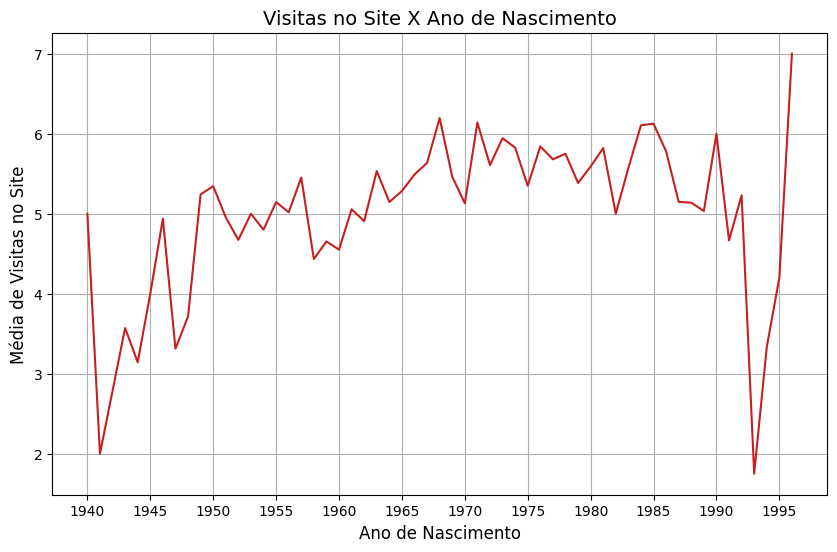

In [14]:
ano_visitas = df.groupby('Year_Birth')['NumWebVisitsMonth'].mean() # Agrupa por 'Year_Birth' e calcula a média de 'NumWebVisitsMonth'

plt.figure(figsize=(10, 6)) # Define o tamanho da figura
plt.plot(ano_visitas.index, ano_visitas, color="#C71F1F") # Plota a linha do gráfico
plt.title('Visitas no Site X Ano de Nascimento', fontsize=14) # Título do gráfico
plt.xlabel('Ano de Nascimento', fontsize=12) # Rótulo do eixo x
plt.ylabel('Média de Visitas no Site', fontsize=12) # Rótulo do eixo y
plt.xticks(range(min(df['Year_Birth']), max(df['Year_Birth'])+1, 5)) # Define os ticks do eixo x
plt.grid(True)
plt.show()

#### Análise do Primeiro Gráfico: 

Antes de seguir para o pré-processamento dos dados, é importante buscar entender a relação entre algumas variáveis entre si para verificar se possíveis conclusões e insights podem ser retirados. Esse primeiro gráfico busca mostra a média de visitas ao site da empresa por ano de nascimento e o que se vê é interessante. Apesar de o esperado ser que quanto mais novo, mais provável é de que o cliente utilize a Internet e entre no site, vemos que em 1993 foi o ano com menor média de visitas, ainda que 1996 seja o com maior. O gráfico é, de uma forma geral, um pouco instável, com quedas e aumentos em anos seguidos e pouca diferença entre o acesso de pessoas com 10 ou 15 anos de diferença, mas mantendo uma consistência entre alguns períodos. O que se pode concluir é que o ano de nascimento não aparenta ser um fator relevante para entender a quantidade de visitas mensais do site, já que isso pouco difere, independentemente da idade. 

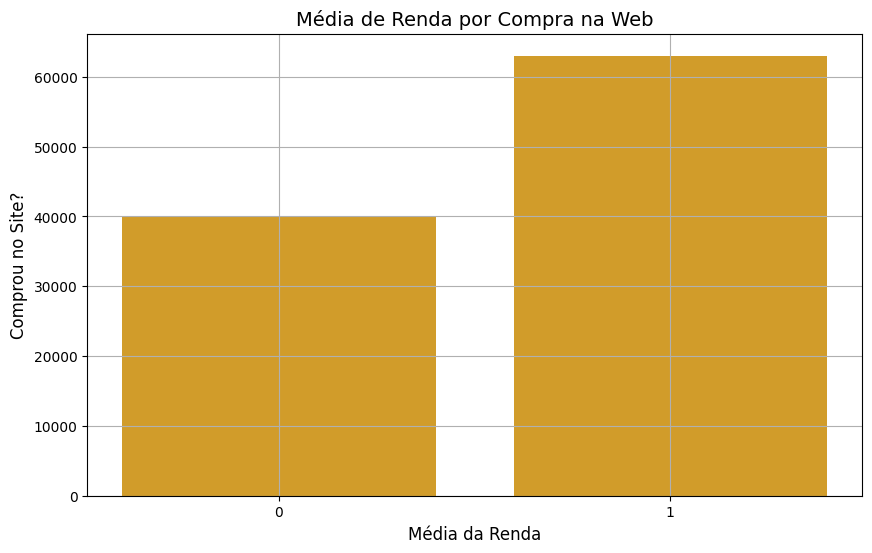

In [15]:
web_compras_renda = df.groupby('WebPurchases')['Income'].mean() # Agrupa por 'WebPurchases' e calcula a média de 'Income'

plt.figure(figsize=(10, 6))
plt.bar(web_compras_renda.index, web_compras_renda, color="#D19C2A")
plt.title('Média de Renda por Compra na Web', fontsize=14)
plt.xlabel('Média da Renda', fontsize=12)
plt.ylabel('Comprou no Site?', fontsize=12)
plt.xticks(range(0, 2))
plt.grid(True)
plt.show()

#### Análise do Segundo Gráfico: 

O segundo gráfico mostra a relação da variável alvo 'WebPurchases', ou seja, se o cliente comprou ou não pelo site, com a média de renda. O gráfico apresentou que a média de renda dos que não compraram é 40.0000 e dos que compraram é de 65.000, o que permite a conclusão de que uma maior renda indica uma tendência maior de comprar pelo site. Essa informação aponta para uma relação entre ambas as variáveis, tendo uma boa utilidade para o modelo e é de grande importância para que a tomada de decisões estratégicas possa ser tomada. 

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes. 

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar. 


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia. 








In [16]:
label_encoder = LabelEncoder() # Inicializa o codificador de rótulos

df_encoded = df.copy() # Cria uma cópia do DataFrame original para codificação
 
df_encoded['Marital_Status_Encoded'] = label_encoder.fit_transform(df['Marital_Status']) # Codifica a coluna 'Marital_Status'

education_ordem = {'Basic': 0, 'Graduation': 1, 'Master': 2, 'PhD': 3} # Define a ordem para codificação ordinal da coluna 'Education'

df_encoded['Education_Encoded'] = df['Education'].map(education_ordem) # Codifica a coluna 'Education' usando o mapeamento definido

cols = list(df.columns) # Lista das colunas do DataFrame original

marital_status_index = cols.index('Marital_Status') # Índice da coluna 'Marital_Status'
education_index = cols.index('Education') # Índice da coluna 'Education'

novas_cols = cols.copy() # Cria uma cópia da lista de colunas para modificar a ordem
novas_cols[marital_status_index] = 'Marital_Status_Encoded' # Substitui o nome da coluna 'Marital_Status' pelo nome codificado
novas_cols[education_index] = 'Education_Encoded' # Substitui o nome da coluna 'Education' pelo nome codificado

df_encoded = df_encoded.drop(['Education', 'Marital_Status'], axis=1) # Remove as colunas originais não codificadas
df_encoded = df_encoded[novas_cols] # Reordena as colunas do DataFrame codificado
df_encoded

,Year_Birth,Education_Encoded,Marital_Status_Encoded,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,1,2,58138.0,0,58,635.0,81.0,542.875,120.5,81.0,88.0,4,7,0,1
1,1954,1,2,46344.0,1,38,11.0,1.0,6.000,2.0,1.0,6.0,2,5,0,0
2,1965,1,3,71613.0,0,26,426.0,49.0,127.000,111.0,21.0,42.0,10,4,0,1
3,1984,1,3,26646.0,1,26,11.0,4.0,20.000,10.0,3.0,5.0,4,6,0,0
4,1981,3,1,58293.0,1,94,173.0,43.0,118.000,46.0,27.0,15.0,6,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,1,61223.0,0,46,709.0,43.0,182.000,42.0,81.0,126.5,4,5,0,1
2236,1946,3,3,64014.0,2,56,406.0,0.0,30.000,0.0,0.0,8.0,5,7,0,1
2237,1981,1,0,56981.0,0,91,908.0,48.0,217.000,32.0,12.0,24.0,13,6,0,0
2238,1956,2,3,69245.0,0,8,428.0,30.0,214.000,80.0,30.0,61.0,10,3,0,1


#### Transformação de Dados Categóricos 

Os modelos que serão aplicados processam apenas variáveis numéricas, então é necessário que as categóricas sejam removidas ou codificadas. Nesse projeto, foi escolhido aplicar o 'LabelEncoder' para realizar esse último processo:
 
* **Education**: O 'encoder' escolhido é especialmente eficaz para variáveis ordinais, ou seja, em valores que possuem uma ordem específica. No caso da coluna de 'Education', é possível atribuir um número para cada nível de escolaridade, em que o menor grau de formação é 0, o segundo menor é 1 e assim se vai sucessivamente. 

* **Marital_Status**: Apesar de não ser ordinal, o uso desse 'encoder' para a coluna de estado civil se deve ao fato do grande número de variáveis já existentes na base: 16. Seria possível utilizar o 'One-Hot Enconder' para essa variável, o que seria mais adequado, mas isso geraria novas colunas, cada uma recebendo uma possível resposta para o estado civil como variável binária, resultando, por exemplo, em clientes casados recebendo '1' na nova coluna 'marital_status_casado' e 0 nas outras como 'marital_status_solteiro' e 'marital_status_viuvo'. Essa divisão de uma variável em várias novas colunas aumentaria demasiadamente a base, que já é extensa e prejudicaria o processamento dos algoritmos e os atrasaria. 

Com isso, a base de dados não possuí mais variáveis categóricas e o pré-processamento pode continuar. 

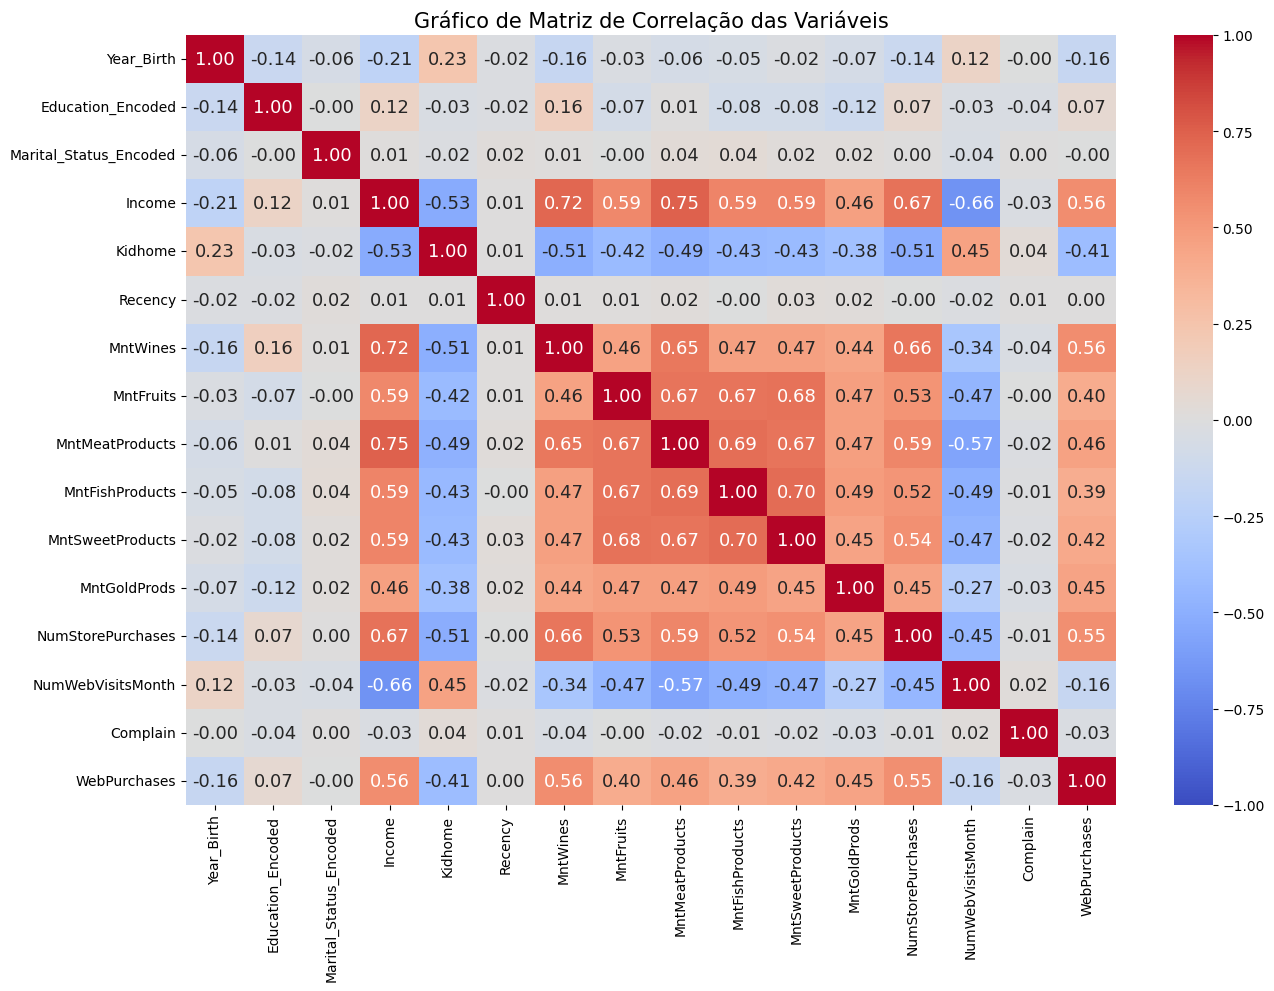

In [17]:
grafico_matriz = df_encoded.corr() # Calcula a matriz de correlação do DataFrame codificado

plt.figure(figsize=(15, 10))
sns.heatmap(grafico_matriz, cmap='coolwarm', fmt='.2f', vmin=-1, annot=True, annot_kws={'size': 13}) # Cria o mapa de calor da matriz de correlação
plt.title('Gráfico de Matriz de Correlação das Variáveis', fontsize=15)
plt.show()

In [18]:
df_encoded = df_encoded.drop(['Recency', 'Complain', 'Marital_Status_Encoded'], axis=1) # Remove colunas irrelevantes ou com baixa correlação

#### Correlação das Variáveis 

Os modelos devem receber apenas as variáveis que possuem relevância para a variável alvo e entre si. Com isso, o gráfico de matriz de correlação plotado acima quantifica e mostra o nível de correlação entre as variáveis, sejam elas quais forem. Para melhor compreendimento, utilizou-se um mapa de calor em que, quanto mais vermelho, mais forte e positiva é a correlação das duas variáveis que a forma e quanto mais azul mais forte e negativa ela é. É possível perceber que nesse projeto, diversas variáveis possuem relações fortes e positivas e algumas são fortes e negativas, porém existem aquelas com valores perto de 0, cinzas, que representam a falta de relevância entre as duas informações. Apesar de ser esperado que nem toda correlação possua um bom teor, percebe-se que existem variáveis que não apresentaram nenhuma correlação forte: 'Recency'(Recência, número de dias desde última visita a loja), 'Complain'(Reclamações, se o cliente já reclamou do serviço) e 'Marital_Status_Encoded'(Estado civil do cliente). Dessa forma, para simplificar o projeto e aprimorar o desempenho do modelo ao fornecer apenas informações importantes, essas colunas foram retiradas do 'df'. 

Sobre a variável target: Ao analisar essas correlações, é de mais extrema importância verificar as com a variável alvo, nesse caso, 'WebPurchases'. Após a remoção das variáveis mencionadas acima, apenas duas variáveis com uma correlação fraca com essa variável foram mantidas: 'Education_Encoded' e 'Year_Birth. Apesar de sua remoção ser completamente válida, elas foram mantidas por apresentarem algumas leve correlações com as outras variáveis, o que pode ser relevante para os modelos em situações mais detalhistas que encontrarem. 

Com isso, foi garantindo que os modelos receberam apenas os dados que possuem relevância para o objetivo do projeto. 

In [19]:
X = df_encoded.drop('WebPurchases', axis=1) # Define as features (variáveis independentes)
y = df_encoded['WebPurchases'] # Define o target (variável dependente)

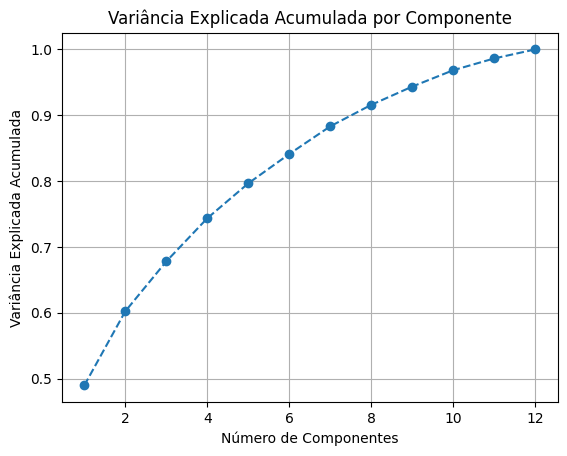

In [20]:
sc = StandardScaler() # Inicializa o escalador padrão

df_x = X.copy() # Cria uma cópia das features para escalonamento

df_x = sc.fit_transform(df_x) # Aplica o escalonamento padrão

pca = PCA(n_components=12) # Inicializa o PCA com 12 componentes principais na cópia para verificar a variância explicada e aplicar o PCA no modelo oficial
pca.fit(df_x) # Ajusta o PCA aos dados escalonados

variancia_explicada = pca.explained_variance_ratio_ # Obtém a variância explicada por cada componente principal
variancia_cumulativa = variancia_explicada.cumsum() # Calcula a variância explicada acumulada

plt.plot(range(1, 13), variancia_cumulativa, marker='o', linestyle='--') # Plota a variância explicada acumulada
plt.title('Variância Explicada Acumulada por Componente') # Título do gráfico
plt.xlabel('Número de Componentes') # Rótulo do eixo x
plt.ylabel('Variância Explicada Acumulada') # Rótulo do eixo y
plt.grid(True)
plt.show()

#### Separação dos Dados em X e Y, e PCA 

Nesse momento, a última parte do pré-processamento de dados ocorre. Para preparar os modelos para previsões, a base é separada inicialmente entre X e Y, em que Y receberá apenas a variável-alvo 'WebPurchases' e X receberá todas as outras variáveis independentes.  

Feita essa etapa, o projeto utilizou de uma ferramenta chamada PCA (Análise de Componentes Principais) para a redução de dimensionalidade dos dados. Essa redução de dimensionalidade consiste em limitar o número de variáveis necessárias para bons resultados de um modelo, mantendo apenas as de maior relevância. Antes de ser aplicada de fato no modelo, foi criado uma cópia da base X padronizada e, utilizando os resultados obtidos ao passarem todas as variáveis ao PCA, é possível obter a variância explicada acumulada. Ao pegar essa informação e botá-la em um gráfico, como feito acima, é possível ver quantos componentes são necessários para explicar uma determinada porcentagem da variância original. Dessa forma, é possível escolher um número de componentes menor para os modelos oficiais que explique uma taxa de variância tão boa quanto ou similar a mais componentes, exigindo menos capacidade computacional do algoritmo e da máquina. 
 
Dessa forma, nesse caso, vemos que 8 componentes já teriam a capacidade de explicar mais de 90% da variância original. 

*Observação: Explicação de padronizar não foi feita acima por não se tratar do modelo oficial e sim do PCA. A explicação sobre o que é Padronização é feita abaixo, ao se falar dos modelos oficiais*

In [21]:
pca = PCA(n_components=10) # Inicializa o PCA com 10 componentes principais para o modelo oficial
X = pca.fit_transform(X) # Aplica o PCA às features

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Divide os dados em conjuntos de treino e teste


X_train = sc.fit_transform(X_train) # Aplica o escalonamento padrão ao conjunto de treino

X_test = sc.fit_transform(X_test) # Aplica o escalonamento padrão ao conjunto de teste

# Verifica as dimensões dos conjuntos de treino e teste
print(f'''X_train: {X_train.shape} 
y_train: {Y_train.shape}
X_test: {X_test.shape}
y_test: {Y_test.shape}
 ''')

X_train: (1657, 10) 
y_train: (1657,)
X_test: (553, 10)
y_test: (553,)
 


#### Separação de X e Y entre Treino e Teste e Padronização 

Apesar de 8 componentes já serem uma quantidade necessária para explicar pouco mais de 90%, o gráfico mostra um bom aumento dessa porcentagem ao utilizar-se 10, indo para mais de 95%. Com isso, para reduzir a complexidade dos dados e lidar com a 'maldição da dimensionalidade', mas para gerar resultados ainda melhores, serão utilizados 10 componentes nos modelos oficiais. 

Após aplicar o PCA ao X verdadeiro, deve-se separar novamente as bases X e Y, cada um se dividindo em uma base de treino e uma de teste, resultando em 4 bases totais, utilizando 'train_test_split'. Porém, as variáveis independentes de das bases 'X_train' e 'X_test' possuem escalas extremamente diferentes, com algumas variando em dezenas, outras em centenas e outras em milhares, o que resulta na necessidade da sua padronização, que pega todas as variáveis presentes nas bases X e as põem em uma escala de média 0 e desvio padrão de 1. A padronização é necessária pois boa parte dos modelos de Machine Learning apresentam dificuldade de processar dados em escalas muito diferentes entre si e necessita que isso seja simplificado, por isso o uso do 'StandardScaler', que é o mais utilizado e que apresenta melhores resultados. 
 
Por fim, é importante verificar se as bases de treino e teste possuem o mesmo tamanho, para garantir que a divisão tenha sido bem-feita e o treinamento possa ser corretamente realizado 

In [22]:
compras_web = Y_train.value_counts() # Conta a frequência de cada valor na coluna 'WebPurchases' do conjunto de treino
porcentagem_compras = (compras_web/ compras_web.sum()) * 100 # Calcula a porcentagem de cada valor
porcentagem_compras

WebPurchases
0    50.935425
1    49.064575
Name: count, dtype: float64

#### Balanceamento 

Para finalizar a etapa de pré-processamento, é importante verificar se a base de treino Y possuem valores balanceados, isso é, que os resultados possíveis possuam mesma quantidade. Isso se deve pois é durante o treinamento que o modelo identificar os padrões para realizar as classificações e previsões de cada resultado possível, então se um valor for muito mais prevalente na base de treino, o modelo se ajustará muito bem a ele apenas e não conseguirá prever outros resultados possíveis ao se deparar com novas informações. Para evitar essa situação, o modelo deve aprender os padrões de cada valor da variável dependente em mesma quantidade, então se houver um grande desbalanceamento, é necessário adicionar dados sintéticos ao treino para que os valores minoritários tenham a mesma quantidade que o majoritário, tudo ficando nivelado. 

No caso desse projeto, vemos que 50.9% dos dados de treino são '0'(Não) e 49.1% são '1'(Sim), o que indica que possuem quantidade praticamente igual, então não há necessidade de balanceamento dos dados. 

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [23]:
regressao_logistica = LogisticRegression(random_state=7, max_iter=10000) # Inicializa o modelo de Regressão Logística com parâmetros para evitar problemas de convergência
param_grid = { # Define a grade de hiperparâmetros para busca em grade
    'C':  [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
folds = 5 # Define o número de folds para validação cruzada

grid_search = GridSearchCV(estimator=regressao_logistica, param_grid=param_grid, cv=folds, n_jobs=-1, verbose=2, scoring='accuracy') # Inicializa a busca em grade com validação cruzada

grid_search.fit(X_train, Y_train) # Executa a busca em grade no conjunto de treino
 
melhor_estimador = grid_search.best_estimator_ # Obtém o melhor estimador encontrado pela busca em grade

rl_pred_train= melhor_estimador.predict(X_train) # Faz previsões no conjunto de treino

rl_pred_test = melhor_estimador.predict(X_test) # Faz previsões no conjunto de teste

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\diggo\Desktop\Random\EBAC\Profissão Cientista de Dados\Módulo 37\Projeto Previsão de Compra de E-commerce\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning:

'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.



#### Primeiro Modelo: Regressão Logística 

O primeiro modelo escolhido foi o de regressão logística, pois esse é principalmente eficaz para previsões e classificações binárias, que é o caso do objetivo do projeto, e possuí boa resistência a 'overfitting'. 

Para gerar os resultados mais positivos possíveis, foram utilizados hiper parâmetros, que diferentemente dos parâmetros normais, são configurações manualmente escritas antes do treinamento que visam otimizar o modelo para melhorar sua performance e capacidade de generalização. Com isso, visando buscar a melhor combinação de hiper parâmetros possíveis, utiliza-se o 'GridSearchCV', que recebe um 'param_grid' que contém quais valores cada hiper parâmetro pode receber e realiza uma busca exaustiva com as bases de treino para encontrar a melhor combinação possível para ser devolvida. 

Com isso, ao realizar esse processo de busca, é possível pegar esse resultado através do 'best_estimator' e aplicá-lo para, de fato, realizar previsões as bases de treino e teste. 

##### Sobre os Hiper Parâmetros de Regressão Logística: 

* **'C'**: Parâmetro que define a força de regularização/penalização do modelo quanto à complexidade e ‘overfitting’ do modelo 

* **'penalty'**: Tipo de penalidade/regularização aplicada 
    * **'l1'**: Adiciona uma penalidade baseada no valor absoluto dos coeficientes. Útil na seleção de variáveis 
    * **'l2'**: Adiciona uma penalidade baseada no quadrado dos coeficientes. Diminui-os para evitar 'overfitting' 

* **'solver'**: Define o algoritmo para otimizar o modelo 
    * **'liblinear'**: Algoritmo eficiente para base de dados menores e que pode receber penalização 'l1' ou 'l2' 

##### Sobre os Parâmetros de GridSeachCV: 

* **estimator**: Recebe o modelo que terá os hiper parâmetros testados 

* **param_grid**: Recebe os hiper parâmetros a serem testados 

* **cv**: Recebe o número de folds(dobras) para o Cross Validation 

* **n_jobs**: Controla o poder de processamento para realizar tarefas paralelas 

* **verbose**: Controla as informações impressas durante a execução 

* **scoring**: Determina a métrica a ser analisada para definir a melhor combinação 

In [24]:
arvore_decisao = DecisionTreeClassifier(random_state=7) # Inicializa o modelo de Árvore de Decisão

param_grid = { # Define a grade de hiperparâmetros para busca em grade
    'max_depth': [4, 8, 10,],               
    'min_samples_leaf':[3, 5, 8],          
    'min_samples_split': [2, 5, 8],            
    'max_features': ['sqrt', 'log2', None], 
    'criterion': ['gini', 'entropy'],       
}
folds = 5

grid_search = GridSearchCV(estimator=arvore_decisao, param_grid=param_grid, cv=folds, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, Y_train)

melhor_estimador = grid_search.best_estimator_

arvore_pred_train = melhor_estimador.predict(X_train)

arvore_pred_test = melhor_estimador.predict(X_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


#### Segundo Modelo: Árvore de Decisão 

O segundo modelo escolhido foi a árvore de decisão, pois esse modelo é simples, possui capacidade de identificar relações não lineares entre as variáveis, isso é, não assume a relação linear das variáveis como outros modelos, além de excelente capacidade de escolha de variáveis mais relevantes. 

O processo desse modelo é extremamente parecido com o anterior: decide-se os hiper parâmetros, realiza a busca pelo GridSearchCV com os mesmos parâmetros para o melhor estimador e aplica esse resultado para realizar previsões. 

##### Sobre os Hiper parâmetros da Árvore de Decisão: 

* **'max_depth'**: Define a profundidade máxima da árvore 

* **'min_samples_leaf'**: Define o número mínimo de amostras em uma folha 

* **'min_samples_split'**: Define o número mínimo de amostras para dividir um nó 

* **'max_features'**: Define o número de características a considerar em cada divisão do nó 
    * **'sqrt'**: Leva em consideração um número igual à raiz quadrada do total de características disponíveis 
    * **'log2'**: Leva em consideração um número igual ao logaritmo na base 2 do total de características 
    * **None**: Leva em consideração todas as características disponíveis 

* **'criterion'**: Determina a função de avaliação da qualidade da divisão do nó 
    * **'gini'**: Avalia a impureza do nó 
    * **'entropy'**: Avalia a desordem do nó 

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [25]:
rl_relatorio = classification_report(Y_test, rl_pred_test) # Gera o relatório de classificação para o modelo de Regressão Logística
rl_matriz = confusion_matrix(Y_test, rl_pred_test) # Gera a matriz de confusão para o modelo de Regressão Logística
rl_cross_val = cross_val_score(regressao_logistica, X, y, cv = folds) # Realiza a validação cruzada para o modelo de Regressão Logística

print(f'\nRelatório:\n{rl_relatorio}')
print(f'\nMatriz de Confusão:\n{rl_matriz}')
print(f'\nCross Validation: {rl_cross_val.mean():.2f}')


Relatório:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       256
           1       0.88      0.81      0.84       297

    accuracy                           0.84       553
   macro avg       0.84      0.84      0.84       553
weighted avg       0.84      0.84      0.84       553


Matriz de Confusão:
[[223  33]
 [ 57 240]]

Cross Validation: 0.85


In [26]:
arvore_relatorio = classification_report(Y_test, arvore_pred_test) # Gera o relatório de classificação para o modelo de Árvore de Decisão
arvore_matriz = confusion_matrix(Y_test, arvore_pred_test) # Gera a matriz de confusão para o modelo de Árvore de Decisão
arvore_cross_val = cross_val_score(arvore_decisao, X, y, cv = folds) # Realiza a validação cruzada para o modelo de Árvore de Decisão

print(f'\nRelatório:\n{arvore_relatorio}')
print(f'\nMatriz de Confusão:\n{arvore_matriz}')
print(f'\nCross Validation: {arvore_cross_val.mean():.2f}')


Relatório:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       256
           1       0.89      0.81      0.85       297

    accuracy                           0.84       553
   macro avg       0.85      0.85      0.84       553
weighted avg       0.85      0.84      0.84       553


Matriz de Confusão:
[[225  31]
 [ 55 242]]

Cross Validation: 0.86


#### Avaliação dos Resultados: 

O relatório de classificação dos modelos apresenta 4 principais métricas de avaliação dos resultados do modelo:  

* **accuracy(Acurácia)**: Calcula a taxa de acerto total do modelo  

* **precision(Precisão)**: Taxa das previsões positivas que o modelo fez que eram, de fato positivas 

* **recall(Sensibilidade)**: Taxa de identificação de casos positivos em relação a todos os casos positivos da base 

* **F1-Score**: Média das métricas de precision e recall. A combinação de ambas 

Juntamente com essas métricas, foi feito a Matriz de Confusão de cada modelo, que apresenta a quantidade de previsões feitas para 0 e 1, tanto as corretas quanto as erradas. 

Além disso, foi utilizado o 'Cross Validation', que consiste em dividir as bases de treino e teste em diversas partes para serem treinadas e testadas de acordo com o número de folds que os modelos receberam. Assim, obtemos médias de diversos resultados para comparar com o obtido no projeto e garantir que é de fato confiável. 

Com essa métricas explicadas, é possível analisar os resultados obtidos. É perceptível, primeiramente, que o resultado foi extremamente satisfatório, com todas as métricas de ambos os modelos sendo maiores ou igual a 80%. Contudo, se vê que a árvore de decisão teve um desempenho apenas um pouco maior que a regressão logística: obteve maior acerto nas previsões de 1 e teve capacidade levemente mais elevada em identificar os casos 0 entre todos aquele que de fato são 0 no 'df', o que resultou em um aumento de 1 para ambos F1-Score da árvore. Ainda assim, vemos que a acurácia é a mesma em ambos, de 84% e verificando a matriz de cada um, a árvore teve 2 acertos a mais nas classificações do que a regressão. 

Por fim, o 'cross validation score' de ambos nos garante que os modelos são, de fato, confiáveis em concluir seus objetivos, já que a média dos resultados de outros 5 modelos treinados e testados com dados organizados diferentemente foram de 85% para regressão e 86% para árvore. 

Dessa forma, pode-se concluir que a árvore de decisão foi por pouquíssimo o modelo superior, por ter capacidades iguais ou maiores do que a de regressão logística. 